In [1]:
from util_api import infer, infer_model, unproj, save_pointcloud, load_dispNet

import numpy as np
import cv2
import matplotlib.pyplot as plt

from path import Path

/home/jiahan/miniconda3/envs/sfmLearner/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# C3VD

model_path = "/home/jiahan/jiahan/checkpoints/SC_Depth_on_C3VD/scenes_all_lossMidas_align/24-03-02-20:04/dispnet_5_checkpoint.pth.tar"
# model_path = "/home/jiahan/jiahan/checkpoints/SC_Depth_on_ours2403/24-04-01-20:17/dispnet_5_checkpoint.pth.tar" # 训练过的


model = load_dispNet(model_path)

=> saving point cloud
(3, 1007, 1162)
[-0.01694728 -0.00611311  0.3012729 ] 
 [ 0.12374005 -0.0647874   0.43339741]
=> distance is 
0.2017237864354128


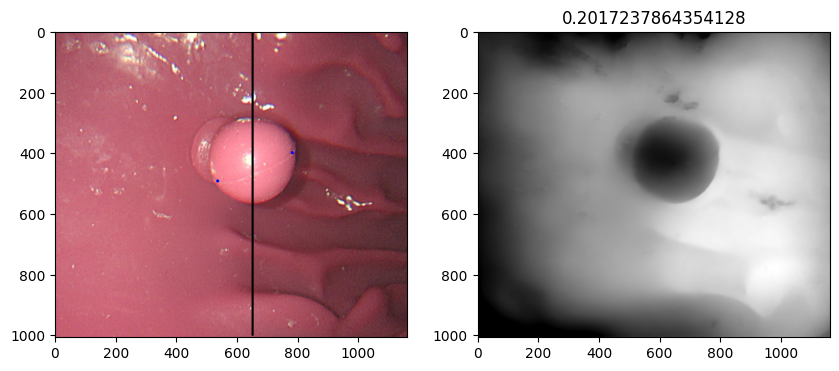

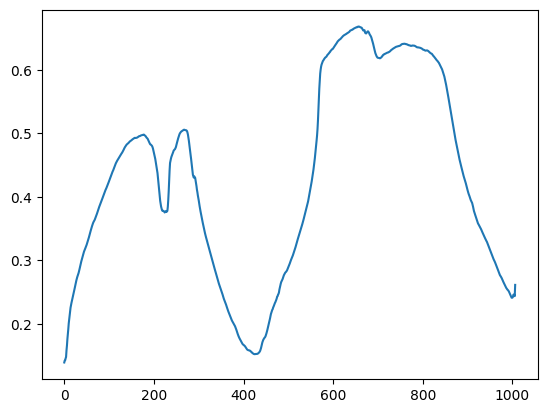

In [5]:
# filename = "/home/jiahan/jiahan/datasets/Ours/2024年3月/undist_20240313_174853_测大小-15mm-带蒂/Frame20240313_175150_0002542_frame.jpg"
# # save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# # (x,y)
# p1x, p1y = 487,679
# p2x, p2y = 496,404

filename = "/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_175415_测大小-18mm-带蒂/Frame20240313_175540_0001045_frame.jpg"
# save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# (x,y)
p1x, p1y = 596,690
p2x, p2y = 599,346

filename = "/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_175728_测大小-30mm-带蒂/Frame20240313_175936_0001830_frame.jpg"
# save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# (x,y)
p1x, p1y = 471,798
p2x, p2y = 525,350

filename = "/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_180538-测大小-11mm-原装1号/Frame20240313_180626_0000525_frame.jpg"
# save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# (x,y)
p1x, p1y = 534,547
p2x, p2y = 586,302

filename = "/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_181002-测大小-12mm-原装2号-带蒂/Frame20240313_181112_0000854_frame.jpg"
# save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# (x,y)
p1x, p1y = 535,493
p2x, p2y = 781,400

# filename = "/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_181228-测大小-8mm-原装3号/Frame20240313_181431_0001516_frame.jpg"
# # save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# # (x,y)
# p1x, p1y = 601,718
# p2x, p2y = 596,491

# filename = "/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_181514-测大小-12mm-原装4号-扁平/Frame20240313_181604_0000455_frame.jpg"
# # save_root_path = Path("/home/jiahan/jiahan/datasets/Ours/202403/undist_20240313_174853_测大小-18mm-带蒂")
# # (x,y)
# p1x, p1y = 627,596
# p2x, p2y = 597,342

save_root_path = Path("/home/jiahan/jiahan/codes/SC-SfMLearner-Release/mesure/point_cloud")
save_root_path.makedirs_p()

img = cv2.imread(filename)
cv2.circle(img,(p1x,p1y), 5,(255,0,0),-1)
cv2.circle(img,(p2x,p2y), 5,(255,0,0),-1)
fx,fy = 719.7949119, 719.8346096
cx,cy = 575.49009715, 507.60611057
intrics = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0,0,1]
])


depth = infer_model(model, filename, resize_shape=(1024,1024))
h,w = depth.shape


print("=> saving point cloud")
save_root_path.makedirs_p()
save_file = save_root_path/f"{filename.split('/')[-2][:-4]}_C3VD上的5epoch.asc"
point_cloud = unproj(intrics, depth, img)
print(point_cloud.shape)
save_pointcloud(point_cloud, save_file)
c1,c2 = point_cloud[:,p1y,p1x], point_cloud[:,p2y,p2x]
print(c1,"\n", c2)

print("=> distance is ")
distance = np.linalg.norm(c1-c2)
print(distance)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
col = 650
cv2.line(img,(col,0), (col,1000), (0,0,0), 5, -1)

plt.imshow(img[...,::-1])
plt.subplot(1,2,2)
plt.title(str(distance))
plt.imshow(depth, cmap='gray')
# plt.savefig(f"./mesure/{filename.split('/')[-2]}.png")


plt.figure()
# plt.plot(depth[500])
plt.plot(depth[:,col])


### 保存所有的深度图

In [4]:
import scipy.io as scio

def savemat(filename, depth):
    scio.savemat(filename, {'data':depth})

save_rootpath = Path("/home/jiahan/jiahan/datasets/Ours/sc_pred_untrained")
save_rootpath.makedirs_p()

dataset_rootpath = Path("/home/jiahan/jiahan/datasets/Ours/datasets")
scenes = dataset_rootpath.listdir()
scenes = [scene for scene in scenes if scene.split('/')[-1][0:2]=='un']

for scene in scenes:
    name = scene.split('/')[-1]
    imgfiles = sorted(scene.listdir("*.jpg"))
    savepath = save_rootpath/name
    savepath.makedirs_p()
    
    for filename in imgfiles:
        savename = filename.split('/')[-1][:-4]
        depth = infer_model(model, filename, resize_shape=(1024,1024))
        savemat(savepath/savename+'.mat', depth)